# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Farid Asroful Anam]
- **Email:** [m316d4ky1399@bangkit.academy]
- **ID Dicoding:** [m316d4ky1399]

## Menentukan Pertanyaan Bisnis

- Question 1 : Does the weather affect the number of bicycles rented? If so, what are the most influential weather factors?
- Question 2 : Is there a different pattern of bicycle usage between 2011 and 2012?

## Import Semua Packages/Library yang Digunakan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

<H3>Tabel Day<H3>

In [14]:
day_df = pd.read_csv("/content/drive/MyDrive/dataset_bike - PROYEK ANALISIS DATA/day.csv")
day_df.head(200)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2011-07-15,3,0,7,0,5,1,1,0.663333,0.624371,0.591250,0.182833,1318,4220,5538
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
197,198,2011-07-17,3,0,7,0,0,0,1,0.719167,0.669833,0.604167,0.245033,2006,3296,5302
198,199,2011-07-18,3,0,7,0,1,1,1,0.746667,0.703925,0.651250,0.215804,841,3617,4458


Some additional information on the **DAY** table

*   
  - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered






---



### Assessing Data

#### Table Day

In [15]:
# Day table check

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Seperti yang bisa dilihat, kolom 'dteday' menunjukan tipe data object yang mana harusnya 'datetime'. Maka dari itu perlu adanya pergantian tipe datanya...

In [16]:
# check missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
# check for duplicates

print("Duplicates Data: ", day_df.duplicated().sum())

Duplicates Data:  0


Ternyata, pada dataset Day tidak terdapat missing value dan duplicate data



---



### Cleaning Data

#### Dataset Day

In [18]:
# change the data type of the object ==> datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa



---



## Exploratory Data Analysis (EDA)

In [ ]:
# check the entire dataset
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"],
    "season" : "unique"
})

instant   cnt                     season
     nunique   max   min         mean  unique
mnth                                         
1         62  4521   431  2176.338710     [1]
2         57  5062  1005  2655.298246     [1]
3         62  8362   605  3692.258065  [1, 2]
4         60  7460   795  4484.900000     [2]
5         62  8294  2633  5349.774194     [2]
6         60  8120  3767  5772.366667  [2, 3]
7         62  8173  3285  5563.677419     [3]
8         62  7865  1115  5664.419355     [3]
9         60  8714  1842  5766.516667  [3, 4]
10        62  8156    22  5199.225806     [4]
11        60  6852  1495  4247.183333     [4]
12        62  6606   441  3403.806452  [4, 1]

The highest number of bicycles rented is in month 9, which is the month when the season changes from season 3 to season 4.

In [ ]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "sum"],
})

instant   cnt                           
   nunique   max  min         mean      sum
yr                                         
0      365  6043  431  3405.761644  1243103
1      366  8714   22  5599.934426  2049576

There was an increase in Bike Sharing users from year 0 (2011) to year 1 (2012), where the total number of uses increased by 806,473 times used.

In [ ]:
# Find the correlation between the 'season' and 'cnt' columns
correlation = day_df['season'].corr(day_df['cnt'])

print(f"The correlation between 'season' and 'cnt' is: {correlation}")

The correlation between 'season' and 'cnt' is: 0.4061003707986365


At first, I assumed that the increase in Bike Sharing users was due to seasonal changes, but from the correlation value that appears, it is not so good.

In [ ]:
day_df.groupby(by='workingday').cnt.count()

workingday
0    231
1    500
Name: cnt, dtype: int64

from the pivot table, it can be seen that users use the Bike Sharing more when it is on weekdays than when it is not.

In [ ]:
day_df.groupby(by='weathersit').cnt.count()

weathersit
1    463
2    247
3     21
Name: cnt, dtype: int64

Weather conditions also affect the use of Bike Sharing. From the pivot table, users prefer to use Bike Sharing when the weather is Clear, Few clouds, Partly cloudy, and Partly cloudy.

In [ ]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean"],
    "windspeed" : ["max", "min", "mean"]
})

instant   cnt                   windspeed                    
   nunique   max  min         mean       max       min      mean
yr                                                              
0      365  6043  431  3405.761644  0.507463  0.022392  0.191403
1      366  8714   22  5599.934426  0.441563  0.046650  0.189572

In the pivot table, it turns out that the average windspeed level in year 0 (2011) decreased in year 1 (2012). From this decrease, it is inversely proportional to the use of Bike Sharing. It can also be seen that the max value of Bike Sharing users also increased.

In [ ]:
day_df["hum_group"] = day_df.hum.apply(lambda x : "Cold" if x <0.45 else ("Heat" if x >0.65 else "Warm"))
day_df.groupby(by='hum_group').instant.nunique()

hum_group
Cold     72
Heat    325
Warm    334
Name: instant, dtype: int64

Reporting from [Higienis Indonesia](https://www.higienis.com/blog/humidity-guide/), here I classify the humidity level in general into three conditions, namely cold, warm, and heat. It turns out that many users prefer to use Bike Sharing when the humidity level is in Heat and Warm conditions.

<ipython-input-219-327a7c2e2143>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(), annot = True, linewidths = 1.1, cmap = 'coolwarm')


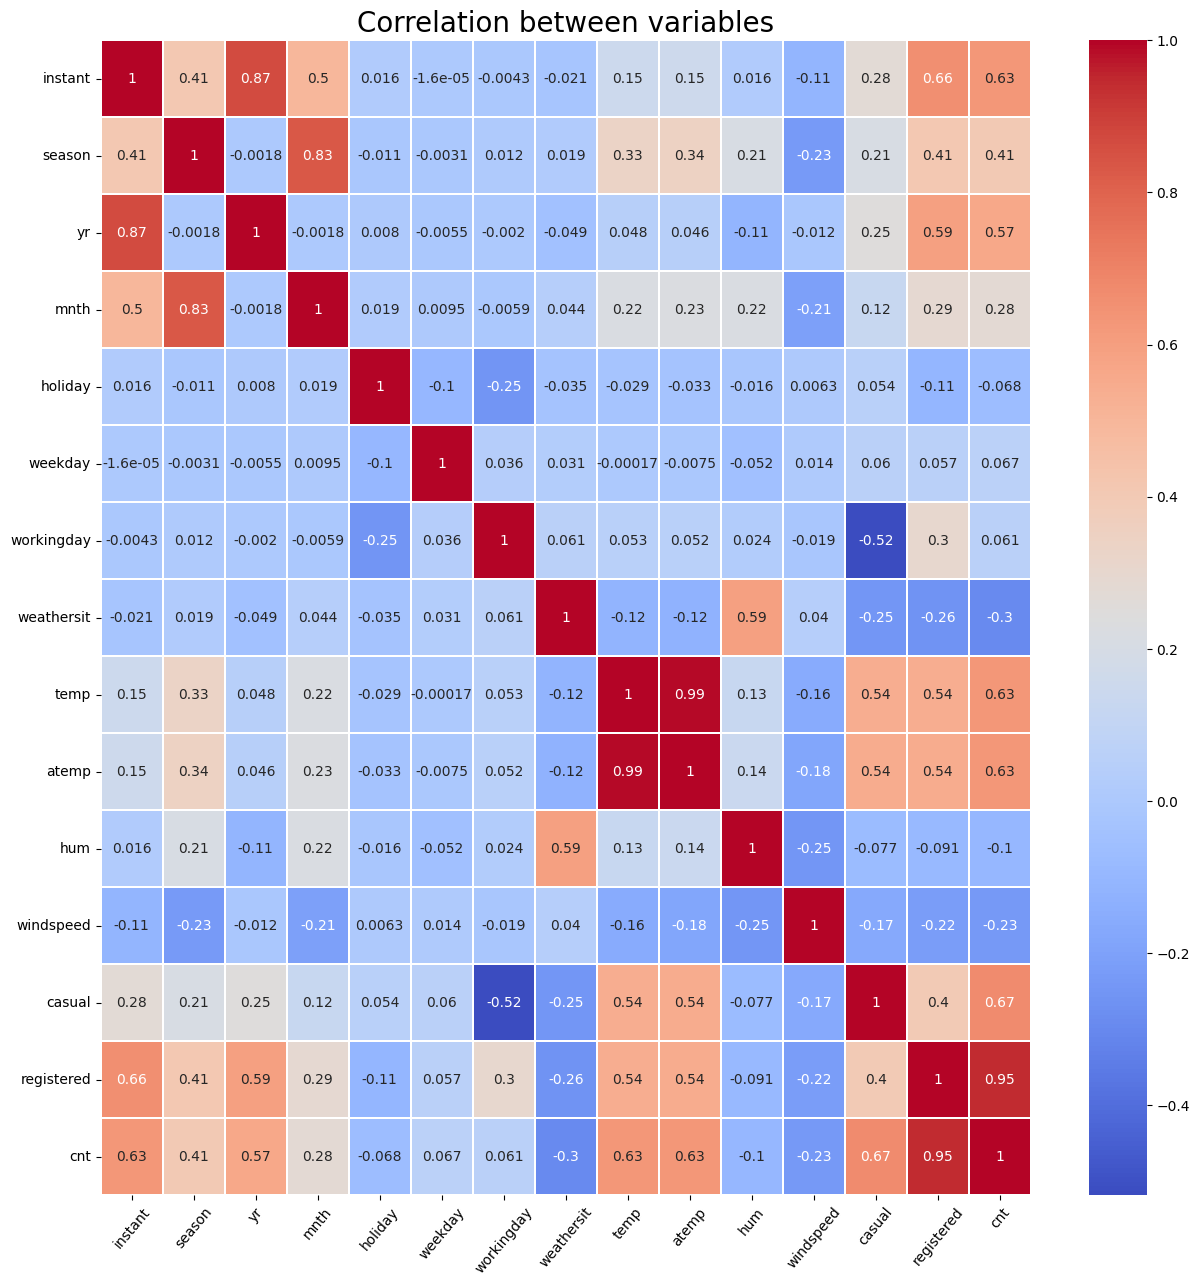

In [ ]:
# Look at the correlation between variables to find important features
plt.rcParams['figure.figsize'] = (15, 15)
sns.heatmap(day_df.corr(), annot = True, linewidths = 1.1, cmap = 'coolwarm')
plt.title('Correlation between variables', fontsize = 20)
plt.xticks(rotation=50)
plt.show()



---



## Visualization & Explanatory Analysis

### Pertanyaan 1:

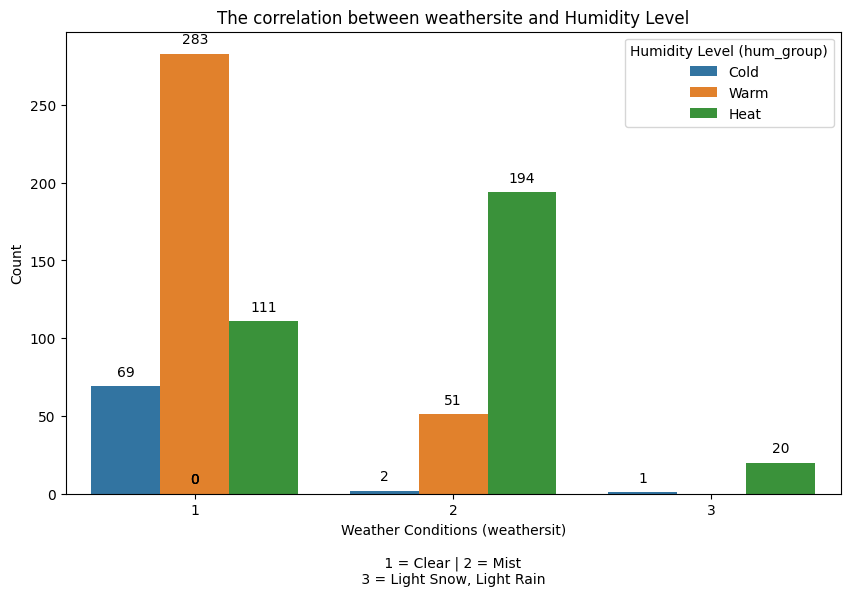

In [ ]:
# Create a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', hue='hum_group', data=day_df)

# Adding labels and titles
plt.xlabel('Weather Conditions (weathersit)\n\n 1 = Clear | 2 = Mist \n 3 = Light Snow, Light Rain ')
plt.ylabel('Count')
plt.title('The correlation between weathersite and Humidity Level')

# Display the legend
plt.legend(title='Humidity Level (hum_group)')

# Added value indicators above each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Display chart
plt.show()

From the visualization, it turns out that weather conditions greatly affect the use of Bike Sharing. Where we can see users prefer to use Bike Sharing when the weather conditions are Clear. Here I also add the humidity level of the weather at that time.



---



### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

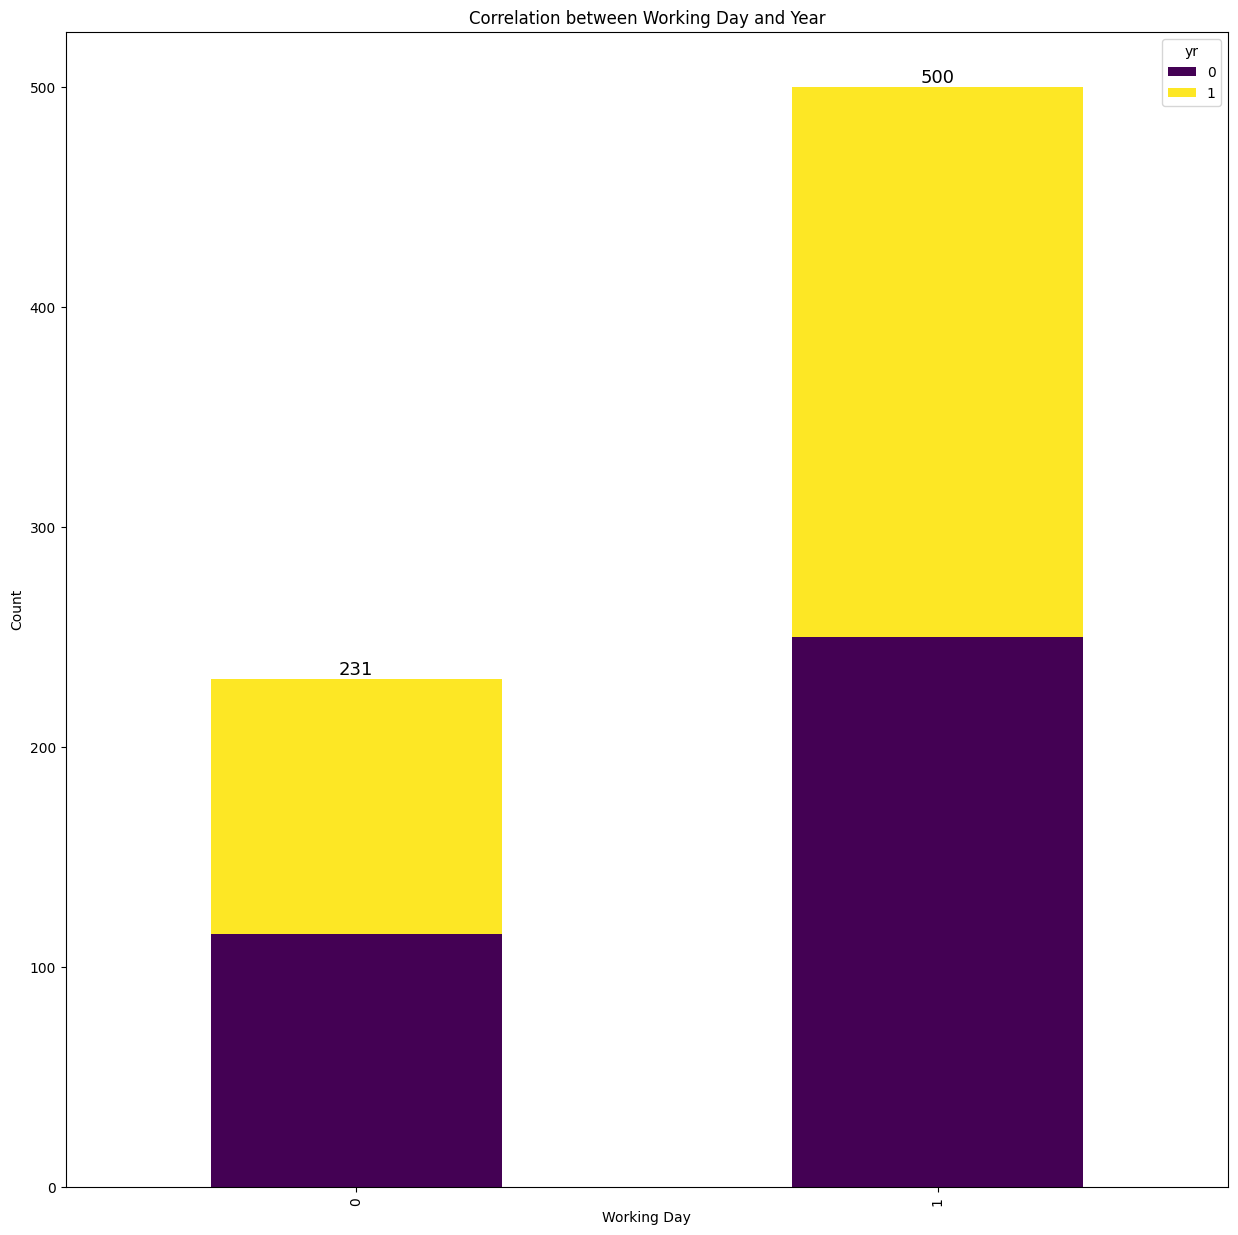

In [ ]:
# Calculating the sum of each combination of workingday and yr
working_by_yr = day_df.groupby(['workingday', 'yr']).size().unstack()

# creating a bar chart
plt.figure(figsize=(10, 6))
working_by_yr.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and titles
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Correlation between Working Day and Year')

# Display the value above each bar
for index, value in enumerate(working_by_yr.sum(axis=1)):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=13)

# Display plot
plt.show()

From the visuliation, it turns out that the increase in the number of working days in year 0 (2011) has increased to 2x more in year 1 (2012). This could be the cause of the increase in Bike Sharing users.

<Figure size 1000x600 with 0 Axes>

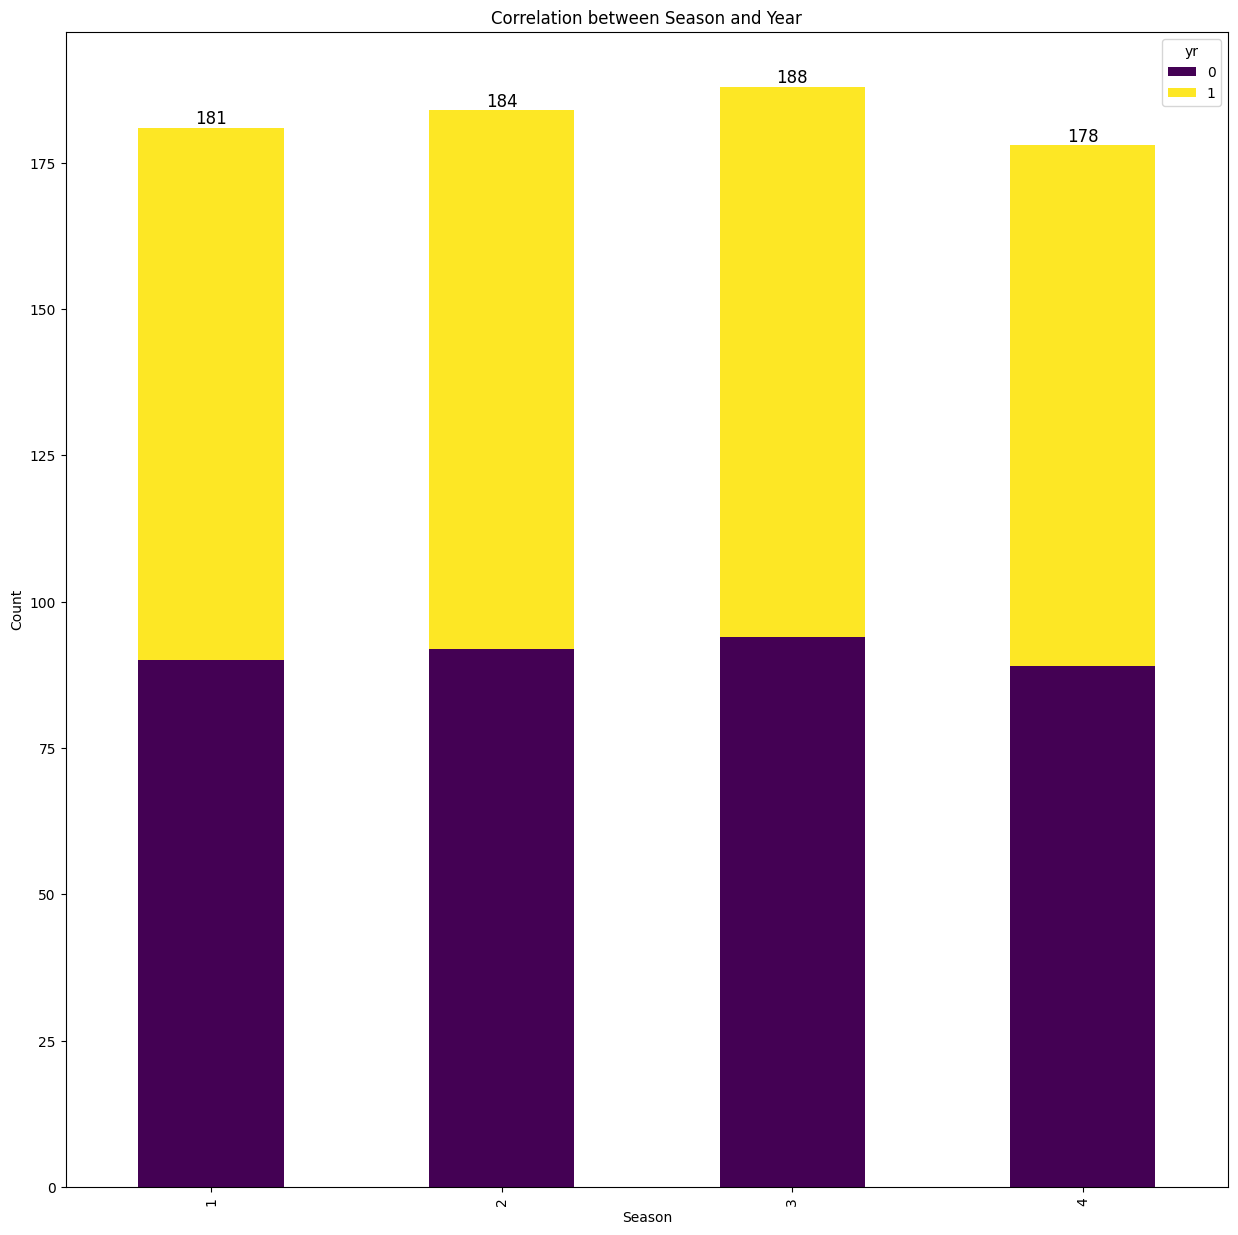

In [ ]:
# Calculating the sum of each combination of season and yr
season_by_yr = day_df.groupby(['season', 'yr']).size().unstack()

# Create bar chart
plt.figure(figsize=(10, 6))
season_by_yr.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and titles
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Correlation between Season and Year')

# Display the value above each bar
for index, value in enumerate(season_by_yr.sum(axis=1)):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Display plot
plt.show()

It turns out that there is no significant change between the season in year 0 (2011) and the season in year 1 (2012).

<Figure size 1000x600 with 0 Axes>

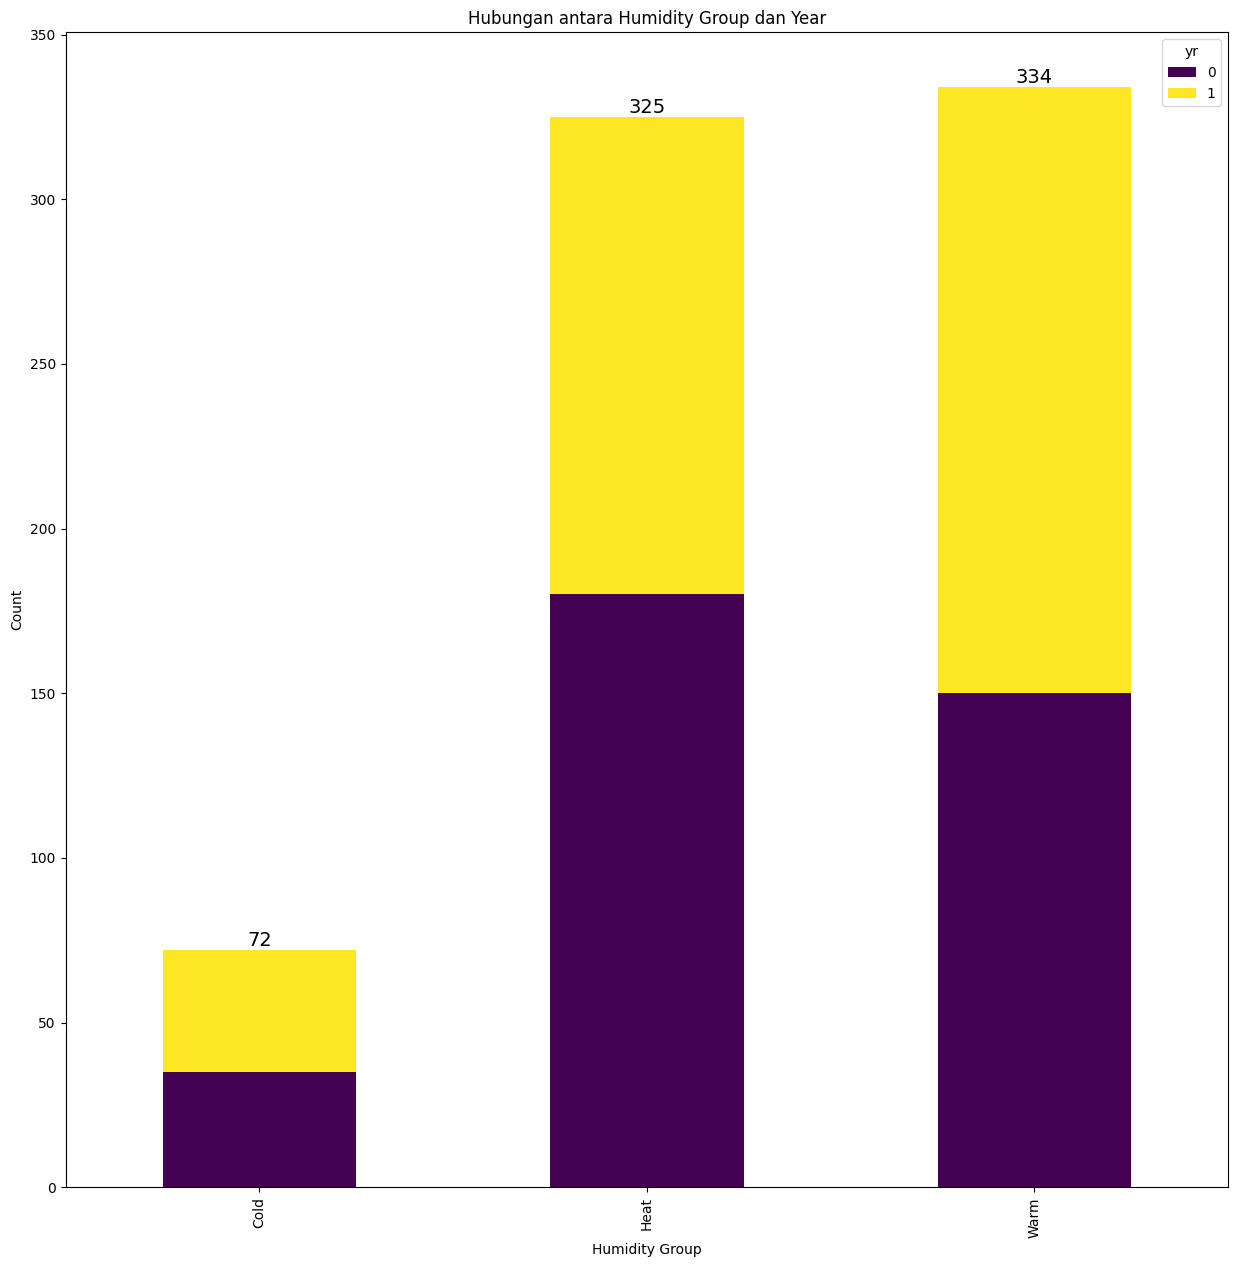

In [ ]:
# Calculating the sum of each combination of hum_group and yr
hum_group_by_yr = day_df.groupby(['hum_group', 'yr']).size().unstack()

# Create bar chart
plt.figure(figsize=(10, 6))
hum_group_by_yr.plot(kind='bar', stacked=True, colormap='viridis')

# Adding labels and titles
plt.xlabel('Humidity Group')
plt.ylabel('Count')
plt.title('Correlation between Humidity Group and Year')

# Display the value above each bar
for index, value in enumerate(hum_group_by_yr.sum(axis=1)):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

# Display plot
plt.show()

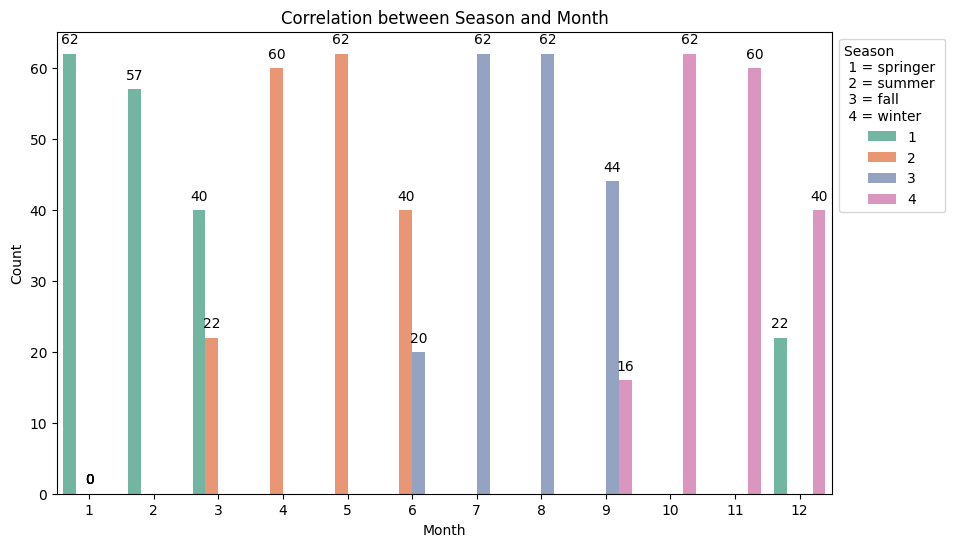

In [ ]:
# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='mnth', hue='season', data=day_df, palette='Set2')

# Adding labels and titles
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Correlation between Season and Month')

# Display legend outside the plot
plt.legend(title='Season \n 1 = springer \n 2 = summer \n 3 = fall \n 4 = winter', bbox_to_anchor=(1, 1), loc='upper left')

# Display the value above each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display plot
plt.show()

From the visuliation, the months that occur in the change of season occur in the 3rd month (March), 6th month (June), 9th month (September), and 12th month (December).

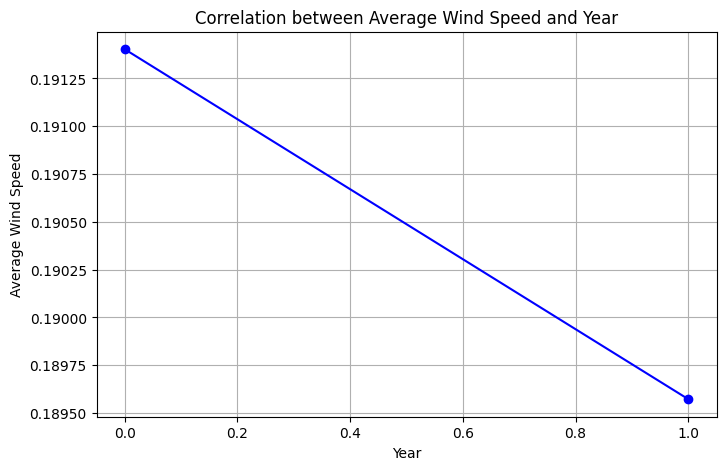

In [ ]:
# Calculate the average windspeed for each year
avg_windspeed_by_year = day_df.groupby('yr')['windspeed'].mean()

# Create line chart
plt.figure(figsize=(8, 5))
avg_windspeed_by_year.plot(marker='o', linestyle='-', color='b')

# Adding labels and titles
plt.xlabel('Year')
plt.ylabel('Average Wind Speed')
plt.title('Correlation between Average Wind Speed and Year')

# Display plot
plt.grid(True)
plt.show()

As can be seen, it turns out that the average wind speed decreased.This is also a possible factor in the increased use of Bike Sharing

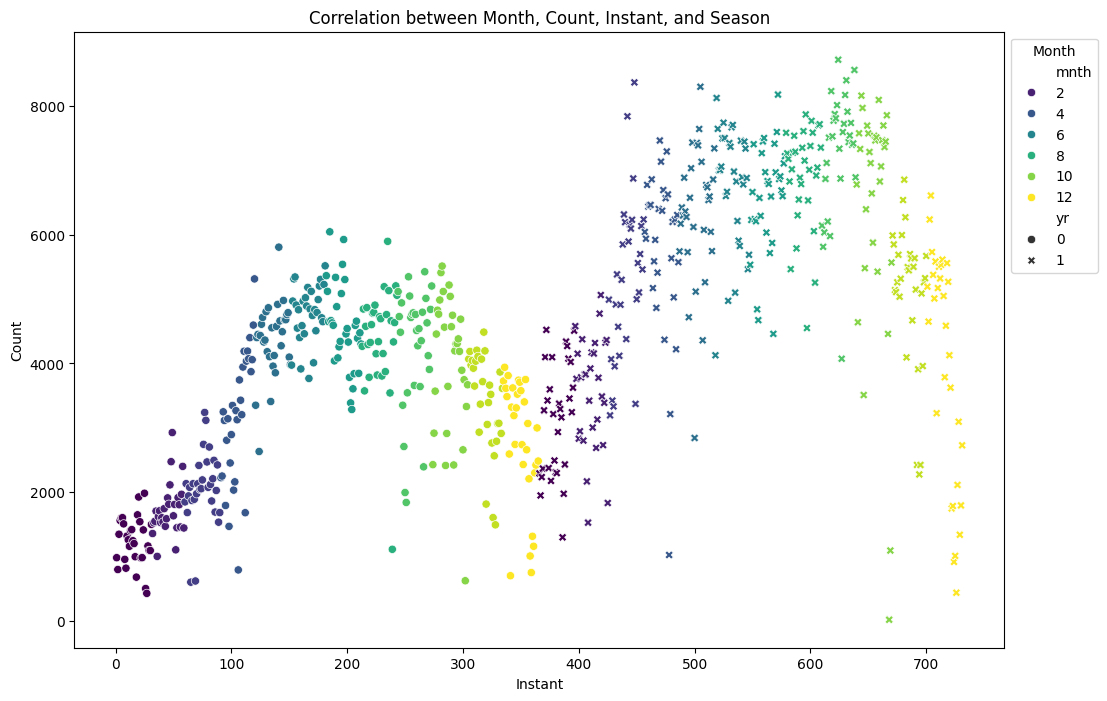

In [ ]:
# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='instant', y='cnt', hue='mnth', style='yr', data=day_df, palette='viridis', sizes=(20, 200))

# Adding labels and titles
plt.xlabel('Instant')
plt.ylabel('Count')
plt.title('Correlation between Month, Count, Instant, and Season')

plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')

# Display plot
plt.show()

In 2011 and 2012, the increase in bicycle loans increased from the 1st month (January) to the 8th month (August).And there began to be a decrease in usage in the 9th month (September) to the 12th month (December). This is supported by the seasonal changes shown in the "Correlation between Season and Month" visualization.

<Figure size 1200x800 with 0 Axes>

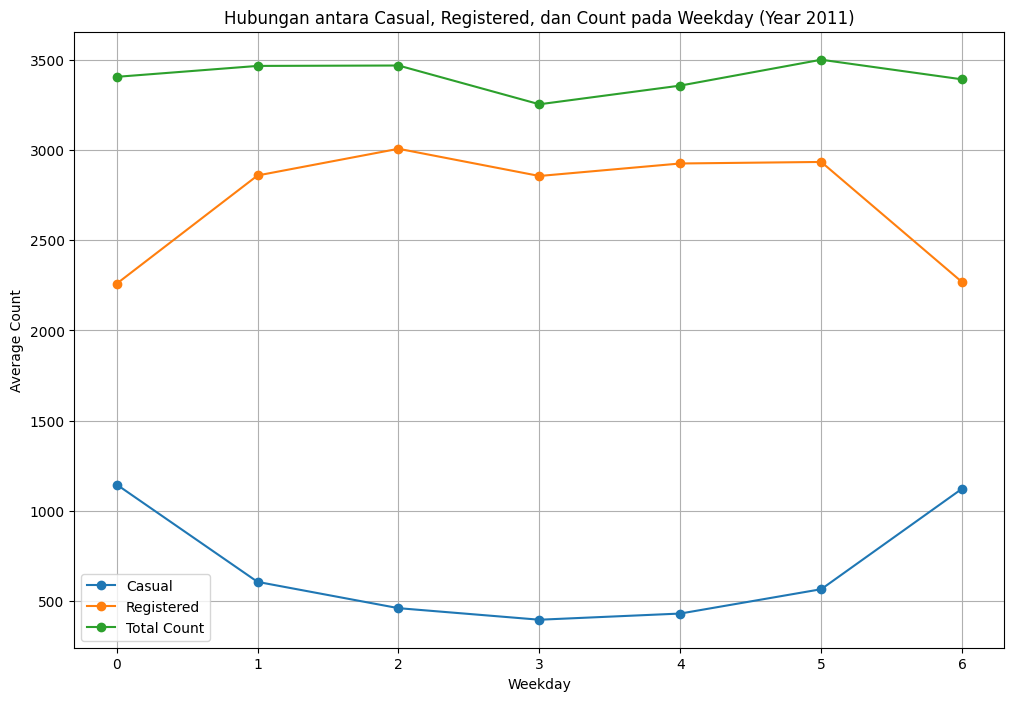

In [ ]:

# Filter data for year 2011 (yr=0)
df_yr_0 = day_df[day_df['yr'] == 0]

# Calculate average casual, registered, and cnt for each weekday
avg_by_weekday = df_yr_0.groupby('weekday')[['casual', 'registered', 'cnt']].mean()

# Create line chart
plt.figure(figsize=(12, 8))
avg_by_weekday.plot(marker='o', linestyle='-', figsize=(12, 8))

# Adding labels and titles
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.title('Correlation between Casual, Registered, and Count on Weekday (Year 2011)')

# Display legend
plt.legend(['Casual', 'Registered', 'Total Count'])

# Display plot
plt.grid(True)
plt.show()

In year 0 (2011) for Registered users, the average usage started at 2250s and then increased.However, there was a slight decline on day 4, then closed with the use of Bike Sharing on day 7 decreasing to the point of 2250 again.

As for casual users, uniquely they started using Bike Sharing on the first day at 1250s but decreased until day 4. Then it rose again until the 7th day until the peak, which is back to the 1250s again.

<Figure size 1200x800 with 0 Axes>

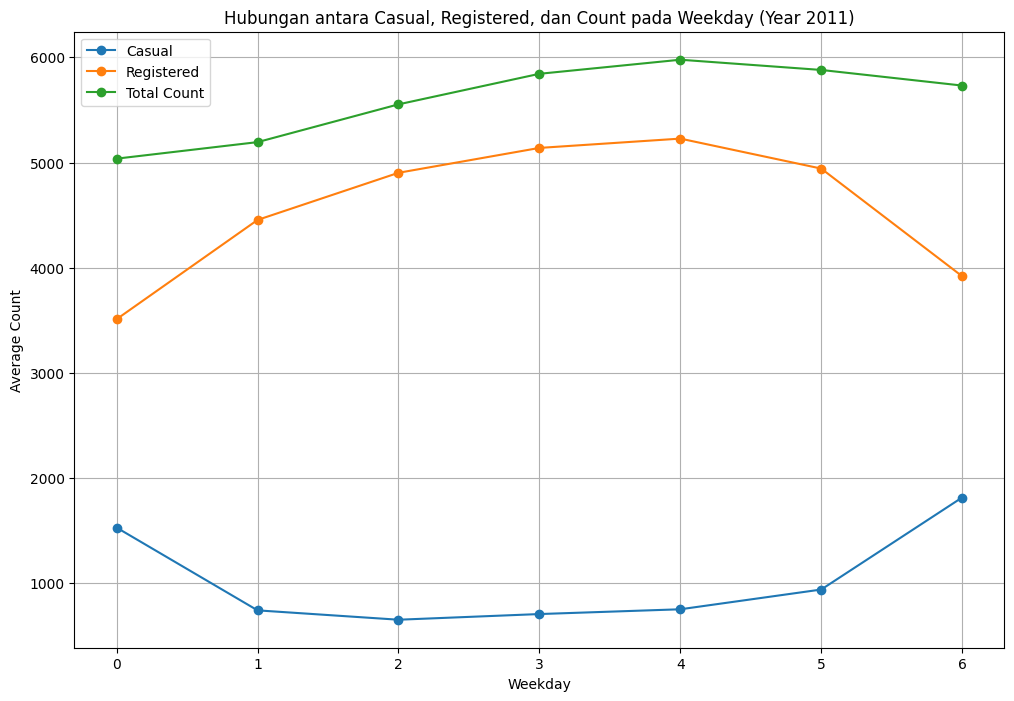

In [ ]:

# Filter data for year 2012 (yr=1)
df_yr_1 = day_df[day_df['yr'] == 1]

# Calculate average casual, registered, and cnt for each weekday
avg_by_weekday = df_yr_1.groupby('weekday')[['casual', 'registered', 'cnt']].mean()

# Create line chart
plt.figure(figsize=(12, 8))
avg_by_weekday.plot(marker='o', linestyle='-', figsize=(12, 8))

# Adding labels and titles
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.title('Correlation between Casual, Registered, and Count on Weekday (Year 2012)')

# Displat legend
plt.legend(['Casual', 'Registered', 'Total Count'])

# Display plot
plt.grid(True)
plt.show()

Then the average daily use of Bike Sharing in year 1 (2012) is shown in the visualization.Actually it is almost the same as in the previous year, it's just an increase in terms of quantity. As shown by Registered users on the first day the average use of Bike Sharing shows a value of 3500.Then this value increased until the 6th day, then decreased to a value of 3950 on the 7th day.

However, for casual users there is not a significant change. Because, on day 1 the average use of Bike Sharing was only 1500s. Then it immediately decreased on day 2 and finally rose slowly. And in the end it rose on the 7th day to a value of 1900.

### Export Data

In [ ]:
day_df.to_pickle("day_data.pickle")

In [ ]:
with open ("day_data.pickle", 'rb') as f:
  data = pickle.load(f)

Export data to Pickle

## Conclusion

- Conclution pertanyaan 1
 - Question 1 : Does the weather affect the number of bicycles rented? If so, what are the most influential weather factors?
   - Answer: Yes, it turns out that the weather is very influential on the use of Bike Sharing. As shown in the previous data, users prefer to use Bike Sharing when the weather is clear and the humidity tends to be warm.

- Conclution pertanyaan 2 :
 - Question 2 : Is there a different pattern of bicycle usage between 2011 and 2012?
   - Answer : From the data we have today, there has been an overall increase in total Bike Sharing users by 806,473 users. This is supported by several factors that determine this number. This is because of the change in pattern that occurred within the past year, where there was a change in the working time of users as well as a change in wind speed. However, for the humidity level, year 1 (2012) tends to be warmer than year 0 (2011) and for the dry/heat level, it tends to be hotter than year 0 (2011). As for the 'cold' humidity level, it is still the same as last year.